In [1]:
! pip install datasets transformers

In [2]:
import numpy as np

X = np.load('/kaggle/input/unber-1k/Visual_Features/Visual_Features/X_data.npy')
y = np.load('/kaggle/input/unber-1k/Visual_Features/Visual_Features/y_data.npy')

In [3]:
X.shape

(1118, 5, 224, 224, 3)

In [4]:
y.shape

(1118,)

In [5]:
X = X.reshape(-1, 224, 224, 3)
y = np.repeat(y, 5)

In [6]:
X.shape

(5590, 224, 224, 3)

In [7]:
y.shape

(5590,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [9]:
from PIL import Image

def data_generator(X, y):
    for img, label in zip(X, y):
        img = np.squeeze(img)  
        img = Image.fromarray(np.uint8(img))  
        yield {"image": img, "labels": label}

In [10]:
from datasets import Dataset

train_dataset = Dataset.from_generator(lambda: data_generator(X_train, y_train))
test_dataset = Dataset.from_generator(lambda: data_generator(X_test, y_test))
val_dataset = Dataset.from_generator(lambda: data_generator(X_val, y_val))

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [11]:
train_dataset

Dataset({
    features: ['image', 'labels'],
    num_rows: 4472
})

In [12]:
ex = train_dataset[180]
ex

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224>,
 'labels': 0}

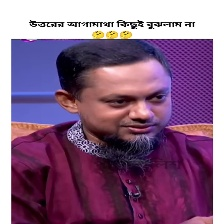

In [13]:
image = ex['image']
image

In [14]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [15]:
feature_extractor

ViTFeatureExtractor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [16]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9922,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9922, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000

In [17]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [18]:
process_example(train_dataset[0])

{'pixel_values': tensor([[[[ 0.3098,  0.3098,  0.3098,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3176,  0.3098,  0.3098,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3098,  0.3098,  0.3098,  ...,  0.3020,  0.3020,  0.3020],
          ...,
          [-0.0275, -0.0275, -0.0196,  ..., -0.2235, -0.1765, -0.1529],
          [-0.0196, -0.0196, -0.0275,  ..., -0.1529, -0.1059, -0.0980],
          [-0.0196, -0.0196, -0.0196,  ..., -0.0353, -0.0039, -0.0039]],

         [[ 0.2627,  0.2627,  0.2627,  ...,  0.2471,  0.2471,  0.2471],
          [ 0.2706,  0.2627,  0.2627,  ...,  0.2471,  0.2471,  0.2471],
          [ 0.2627,  0.2627,  0.2627,  ...,  0.2392,  0.2392,  0.2392],
          ...,
          [-0.0980, -0.0980, -0.1059,  ..., -0.4588, -0.4275, -0.4039],
          [-0.0902, -0.0902, -0.1059,  ..., -0.4039, -0.3725, -0.3647],
          [-0.0902, -0.0902, -0.0980,  ..., -0.2863, -0.2706, -0.2706]],

         [[ 0.3725,  0.3725,  0.3569,  ...,  0.3412,  0.3412,  0.3412],
          [ 0

In [19]:
def transform(example_batch):
    inputs = feature_extractor([x for x in example_batch["image"]], return_tensors="pt")
    inputs["labels"] = example_batch["labels"]
    return inputs

In [20]:
train_dataset = train_dataset.with_transform(transform)

In [21]:
test_dataset = test_dataset.with_transform(transform)

In [22]:
val_dataset = val_dataset.with_transform(transform)

In [23]:
train_dataset[0:2]

{'pixel_values': tensor([[[[ 0.3098,  0.3098,  0.3098,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3176,  0.3098,  0.3098,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3098,  0.3098,  0.3098,  ...,  0.3020,  0.3020,  0.3020],
          ...,
          [-0.0275, -0.0275, -0.0196,  ..., -0.2235, -0.1765, -0.1529],
          [-0.0196, -0.0196, -0.0275,  ..., -0.1529, -0.1059, -0.0980],
          [-0.0196, -0.0196, -0.0196,  ..., -0.0353, -0.0039, -0.0039]],

         [[ 0.2627,  0.2627,  0.2627,  ...,  0.2471,  0.2471,  0.2471],
          [ 0.2706,  0.2627,  0.2627,  ...,  0.2471,  0.2471,  0.2471],
          [ 0.2627,  0.2627,  0.2627,  ...,  0.2392,  0.2392,  0.2392],
          ...,
          [-0.0980, -0.0980, -0.1059,  ..., -0.4588, -0.4275, -0.4039],
          [-0.0902, -0.0902, -0.1059,  ..., -0.4039, -0.3725, -0.3647],
          [-0.0902, -0.0902, -0.0980,  ..., -0.2863, -0.2706, -0.2706]],

         [[ 0.3725,  0.3725,  0.3569,  ...,  0.3412,  0.3412,  0.3412],
          [ 0

In [24]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [25]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import evaluate  # Correct import for metric evaluation

accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    refs = p.label_ids

    return {
        "accuracy": accuracy_metric.compute(predictions=preds, references=refs)["accuracy"],
        "precision": precision_metric.compute(predictions=preds, references=refs, average="weighted")["precision"],
        "recall": recall_metric.compute(predictions=preds, references=refs, average="weighted")["recall"],
        "f1": f1_metric.compute(predictions=preds, references=refs, average="weighted")["f1"],
    }

In [27]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=4,
    ignore_mismatched_sizes=True
)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
from transformers import TrainingArguments, EarlyStoppingCallback

training_args = TrainingArguments(
  output_dir="./vit-UNBER-1k",
  per_device_train_batch_size=16,
  per_device_eval_batch_size=16,
  evaluation_strategy="epoch",
  save_strategy="epoch",
  num_train_epochs=20,
  weight_decay=0.01,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=1,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
  metric_for_best_model="f1",        
  greater_is_better=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [29]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=feature_extractor,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

<ipython-input-29-c404e46c22c3>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [30]:
train_results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.766000,0.612693,0.767442,0.768356,0.767442,0.758192
2,0.257500,0.463223,0.842576,0.860876,0.842576,0.842410
3,0.219900,0.464299,0.867621,0.867491,0.867621,0.866135
4,0.177800,0.665720,0.838998,0.848015,0.838998,0.838753
5,0.037900,0.435050,0.908766,0.910464,0.908766,0.908484
6,0.049200,0.555874,0.892665,0.895070,0.892665,0.892368
7,0.026700,0.554985,0.905188,0.905331,0.905188,0.904964
8,0.008300,0.628497,0.878354,0.886343,0.878354,0.878291
9,0.001800,0.611630,0.905188,0.910718,0.905188,0.904652
10,0.050700,0.614927,0.896243,0.898694,0.896243,0.895991


In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
predictions_output = trainer.predict(test_dataset)
preds = np.argmax(predictions_output.predictions, axis=1)
true_labels = predictions_output.label_ids

In [36]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       222
           1       0.94      0.88      0.91       164
           2       0.94      0.82      0.88       111
           3       0.94      0.97      0.95        62

    accuracy                           0.91       559
   macro avg       0.92      0.91      0.91       559
weighted avg       0.91      0.91      0.91       559



In [33]:
cm = confusion_matrix(true_labels, preds)

In [34]:
labels = ['Safe', 'Adult', 'Harmful', 'Suicidal']

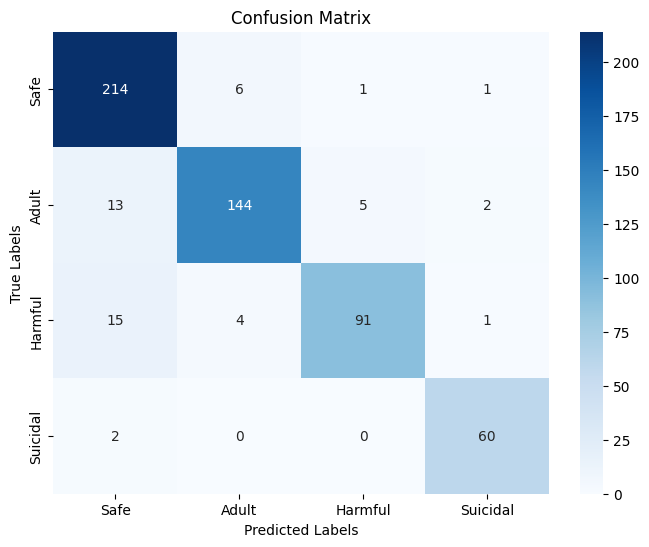

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()